# Further Exploration of Clusters using UMAP

## Table of Contents
* [Import Libraries](#chapter1)

* [Load the Data](#chapter2)
* [2D UMAP Clustering](#2D)

* [Save the Data](#chapter5)


# Import Libraries <a class="anchor" id="chapter1"></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("C:/Users/migue/OneDrive - NOVAIMS/Data Science/Coding Courses/Machine Learning II/Project")
# wd stands for working directory
wd = os.getcwd()

from functions.funcs import *

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import umap
import umap.plot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from pylab import rcParams

c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 

# Load the Data <a class="anchor" id="chapter2"></a>

In [93]:
dfs = create_dfs(wd + "/UMAP/1_cluster_data/")

for key in dfs.keys():
    globals()[key] = dfs[key]
    # print(f"Created global variable {blue}{key}{end} with values from dictionary dfs key {blue}{key}{end}")

Created dataframe best_customers from best_customers.csv
Created dataframe big_families from big_families.csv
Created dataframe cranky_elders from cranky_elders.csv
Created dataframe fish_markets from fish_markets.csv
Created dataframe gamers from gamers.csv
Created dataframe Info_v2 from Info_v2.csv
Created dataframe party_animals from party_animals.csv
Created dataframe promotion_seekers from promotion_seekers.csv
Created dataframe vegetarians from vegetarians.csv
Created dataframe young_adults from young_adults.csv


In [5]:
print_cols(Info_v2, 'Info_v2')

Columns in Info_v2 are: 
	-customer_id, customer_name, customer_gender, customer_birthdate, kids_home, 
	-teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, 
	-typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, 
	-lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, 
	-year_first_transaction, loyalty_card_number, latitude, longitude, is_business, 
	-age, years_as_customer, lifetime_spend, spend_per_year, education_level, 
	-2D_DBSCAN_clusters, 3D_DBSCAN_cluster



In [6]:
spend = [col for col in Info_v2.columns if 'spend' in col]

In [7]:
other = ['kids_home', 'teens_home', 'number_complaints', 'age', 'distinct_stores_visited',
        'is_business', 'education_level', 'percentage_of_products_bought_promotion']

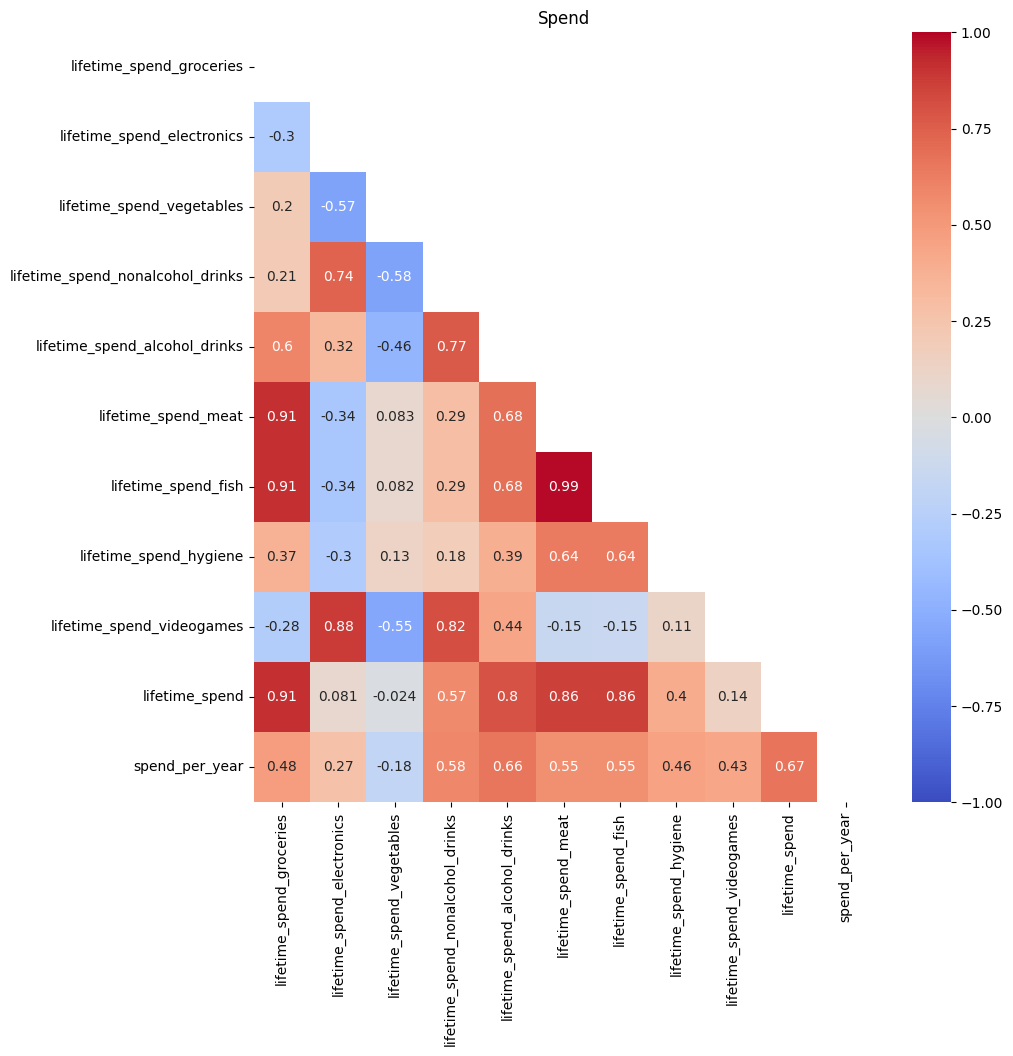

In [8]:
# correlation heatmaps for both spend and other variables
corr_heatmap(Info_v2[spend], 'Spend')
# corr_heatmap(Info_v2[other], 'Other')

In [9]:
# combine "lifetime_spend_meat" and "lifetime_spend_fish" into "lifetime_spend_meat_fish"
Info_v2['lifetime_spend_meat_fish'] = Info_v2['lifetime_spend_meat'] + Info_v2['lifetime_spend_fish']

In [10]:
spend = [col for col in Info_v2.columns if 'spend' in col]

In [11]:
# remove "lifetime_spend_meat", "lifetime_spend_fish", "lifetime_spend" and "lifetime_spend_groceries" from spend
spend = [col for col in spend if col not in ['lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend', 'spend_per_year']] #, 'lifetime_spend_groceries'

### Set the seed

In [13]:
seed = 42

In [14]:
len(Info_v2[spend])

28218

In [15]:
# Load data 
data = Info_v2[spend]

In [16]:
# Standardize data
unscaled_data = data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [17]:
import umap
import numpy as np

# Use UMAP to fit the data and transform it to a lower-dimensional space
reducer = umap.UMAP(n_components=2,
                    n_neighbors=30,
                    min_dist=0.1,
                    random_state=seed)

embedding = reducer.fit(data)


# Applying DBSCAN to the original data (scaled)

In [90]:
dbscan = DBSCAN(eps=0.8357, min_samples=250)
dbscan.fit(data)
labels = dbscan.labels_

<Axes: >

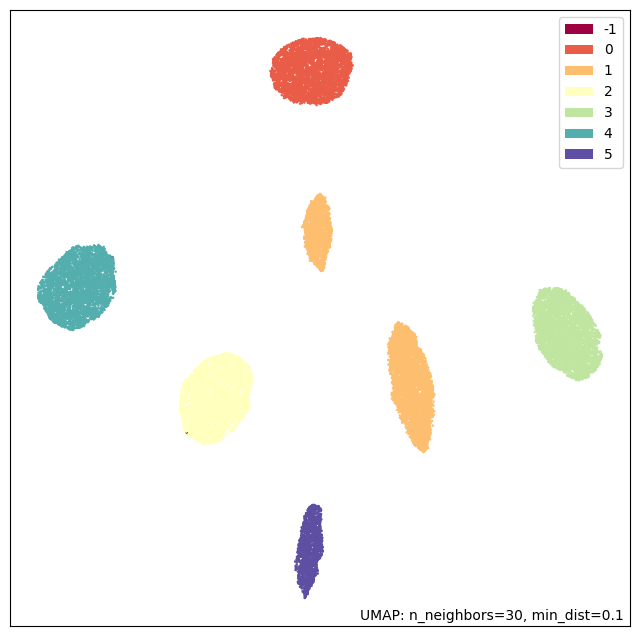

In [91]:
umap.plot.points(reducer, labels=labels)


### Results

In [92]:
group_by_cluster(Info_v2[spend+other+['lifetime_spend_groceries']], labels)

,-1,0,1,2,3,4,5,Overall Mean
lifetime_spend_groceries,8575.67,200.41,401.99,4997.06,997.55,14993.11,6998.61,4223.3
lifetime_spend_electronics,181.0,4999.56,206.12,200.01,50.04,199.97,1002.71,1025.2
lifetime_spend_vegetables,687.33,20.03,300.98,602.08,1499.74,799.56,402.55,597.8
lifetime_spend_nonalcohol_drinks,974.33,1500.95,301.08,900.73,20.01,900.8,400.47,658.5
lifetime_spend_alcohol_drinks,491.67,499.87,230.76,500.88,20.12,599.19,402.98,360.2
lifetime_spend_hygiene,554.33,49.91,50.07,500.75,100.03,199.89,200.34,170.4
lifetime_spend_videogames,762.67,2002.2,66.4,997.65,49.93,50.01,502.89,566.3
lifetime_spend_meat_fish,2433.33,116.69,331.45,2202.11,0.0,2999.86,1398.83,1086.7
kids_home,4.0,0.69,0.85,3.08,1.16,1.0,0.16,1.2
teens_home,1.33,0.07,0.21,1.81,0.77,0.27,0.0,0.5


# Applying DBSCAN to the UMAP data (scaled)

In [20]:
embedding2d = reducer.fit_transform(data)

In [22]:
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(embedding2d)

<Axes: >

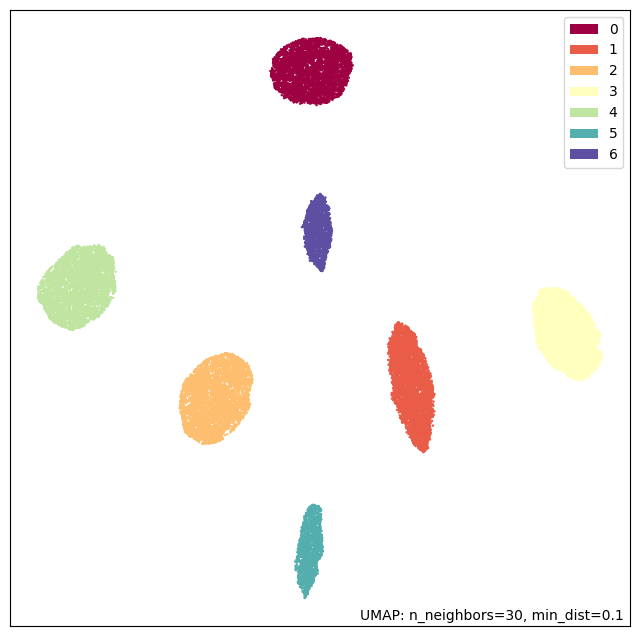

In [23]:
umap.plot.points(reducer, labels=labels)

### Results

In [25]:
group_by_cluster(Info_v2[spend+other], labels)

,0,1,2,3,4,5,6,Overall Mean
lifetime_spend_groceries,200.41,302.96,4997.02,997.55,14993.31,6998.61,617.42,4223.3
lifetime_spend_electronics,4999.56,20.0,200.01,50.04,199.97,1002.71,611.01,1025.2
lifetime_spend_vegetables,20.03,300.23,602.1,1499.74,799.56,402.55,302.61,597.8
lifetime_spend_nonalcohol_drinks,1500.95,300.43,900.79,20.01,900.79,400.47,302.5,658.5
lifetime_spend_alcohol_drinks,499.87,199.78,500.9,20.12,599.15,402.98,298.15,360.2
lifetime_spend_hygiene,49.91,50.03,500.75,100.03,199.99,200.34,50.16,170.4
lifetime_spend_videogames,2002.2,5.0,997.7,49.93,50.01,502.89,199.99,566.3
lifetime_spend_meat_fish,116.69,300.57,2202.16,0.0,2999.8,1398.83,398.62,1086.7
kids_home,0.69,1.0,3.08,1.16,1.0,0.16,0.51,1.2
teens_home,0.07,0.07,1.81,0.77,0.27,0.0,0.52,0.5


In [96]:
Info_v2['cluster'] = labels

Overall, using UMAP to reduce the dimensionality of the data resulting in a big improvement in the clustering. <BR>
We can see that the cluster "Promotion_Seekers" was separated into two. <BR>
This improved the definition of the cluster and generated a new one which is characterized by overall low spending. <BR>
However, these are different from the Promotion_Seekers as they frequent less stores and buy less products using promotions.


# Save Clusters to CSV

In [97]:
# Save the clusters
gamers = Info_v2[Info_v2['cluster'] == 0]
promotion_seekers = Info_v2[Info_v2['cluster'] == 1]
big_families = Info_v2[Info_v2['cluster'] == 2]
vegetarians = Info_v2[Info_v2['cluster'] == 3]
best_customers = Info_v2[Info_v2['cluster'] == 4]
young_adults = Info_v2[Info_v2['cluster'] == 5]
low_spenders = Info_v2[Info_v2['cluster'] == 6]

In [102]:
dfs = {}
for df in [best_customers, big_families, cranky_elders, fish_markets, gamers, low_spenders, party_animals, promotion_seekers, vegetarians, young_adults]:
    var_name = [k for k, v in locals().items() if v is df][0]
    dfs[var_name] = df


In [103]:
# save all dataframes to csv files in a new folder named cluster_data
save_to_csv(dfs, wd + "/UMAP/2_cluster_data/")